problema #1

In [ ]:
def mochila(capacidad, pesos, valores, n):
    # Creamos una tabla para almacenar los valores máximos
    K = [[0 for _ in range(capacidad + 1)] for _ in range(n + 1)]

    # Construimos la tabla K[][] de abajo hacia arriba
    for i in range(n + 1):
        for w in range(capacidad + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            elif pesos[i-1] <= w:
                K[i][w] = max(valores[i-1] + K[i-1][w-pesos[i-1]], K[i-1][w])
            else:
                K[i][w] = K[i-1][w]

    # Reconstruimos la solución para saber qué objetos se seleccionaron
    res = K[n][capacidad]
    w = capacidad
    objetos_seleccionados = []

    for i in range(n, 0, -1):
        if res <= 0:
            break
        if res == K[i-1][w]:
            continue
        else:
            objetos_seleccionados.append(i)
            res -= valores[i-1]
            w -= pesos[i-1]

    return K[n][capacidad], sorted(objetos_seleccionados)

# Casos de prueba
casos = [
    {"pesos": [2, 3, 4, 5], "valores": [3, 4, 5, 6], "capacidad": 5},
    {"pesos": [10, 20, 30], "valores": [60, 100, 120], "capacidad": 50},
    {"pesos": [1, 4, 3, 1], "valores": [1500, 3000, 2000, 2000], "capacidad": 5},
    {"pesos": [2, 3, 4, 5, 9], "valores": [3, 4, 5, 8, 10], "capacidad": 20},
    {"pesos": [1, 2, 3, 4], "valores": [10, 20, 30, 40], "capacidad": 4}
]

for i, caso in enumerate(casos, 1):
    valor, objetos = mochila(caso["capacidad"], caso["pesos"], caso["valores"], len(caso["pesos"]))
    print(f"Caso de Prueba {i}")
    print(f"Objetos seleccionados: {[f'Objeto {o}' for o in objetos]}")
    print(f"Valor total: {valor}\n")

Caso de Prueba 1
Objetos seleccionados: ['Objeto 1', 'Objeto 2']
Valor total: 7

Caso de Prueba 2
Objetos seleccionados: ['Objeto 2', 'Objeto 3']
Valor total: 220

Caso de Prueba 3
Objetos seleccionados: ['Objeto 1', 'Objeto 3', 'Objeto 4']
Valor total: 5500

Caso de Prueba 4
Objetos seleccionados: ['Objeto 1', 'Objeto 3', 'Objeto 4', 'Objeto 5']
Valor total: 26

Caso de Prueba 5
Objetos seleccionados: ['Objeto 1', 'Objeto 3']
Valor total: 40



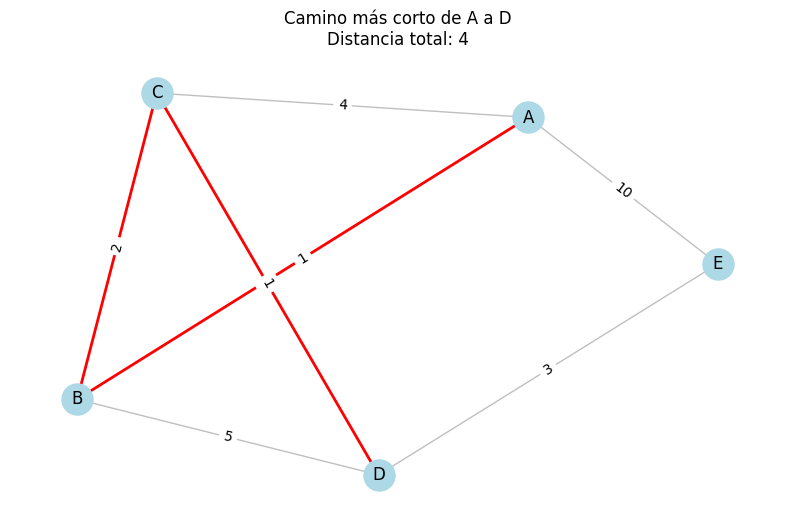

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_grafico(grafo, inicio, fin):
    G = nx.Graph()
    for nodo in grafo:
        for vecino, peso in grafo[nodo].items():
            G.add_edge(nodo, vecino, weight=peso)

    camino_mas_corto = nx.shortest_path(G, inicio, fin, weight='weight')
    distancia = nx.shortest_path_length(G, inicio, fin, weight='weight')

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))

    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_labels(G, pos)

    edges_camino = [(camino_mas_corto[i], camino_mas_corto[i+1]) for i in range(len(camino_mas_corto)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges_camino, edge_color='red', width=2)

    otras_edges = [edge for edge in G.edges() if edge not in edges_camino]
    nx.draw_networkx_edges(G, pos, edgelist=otras_edges, edge_color='gray', alpha=0.5)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title(f'Camino más corto de {inicio} a {fin}\nDistancia total: {distancia}')
    plt.axis('off')
    plt.show()

grafo = {
    'A': {'B': 1, 'C': 4, 'E': 10,},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1, 'E': 3},
    'E': {'A': 10, 'D': 3}
}
dijkstra_grafico(grafo, 'A', 'D')